In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries


from tensorflow.keras.preprocessing.image import load_img, img_to_array

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [3]:
picture_size = 48
location ="../input/face-expression-recognition-dataset/images/"

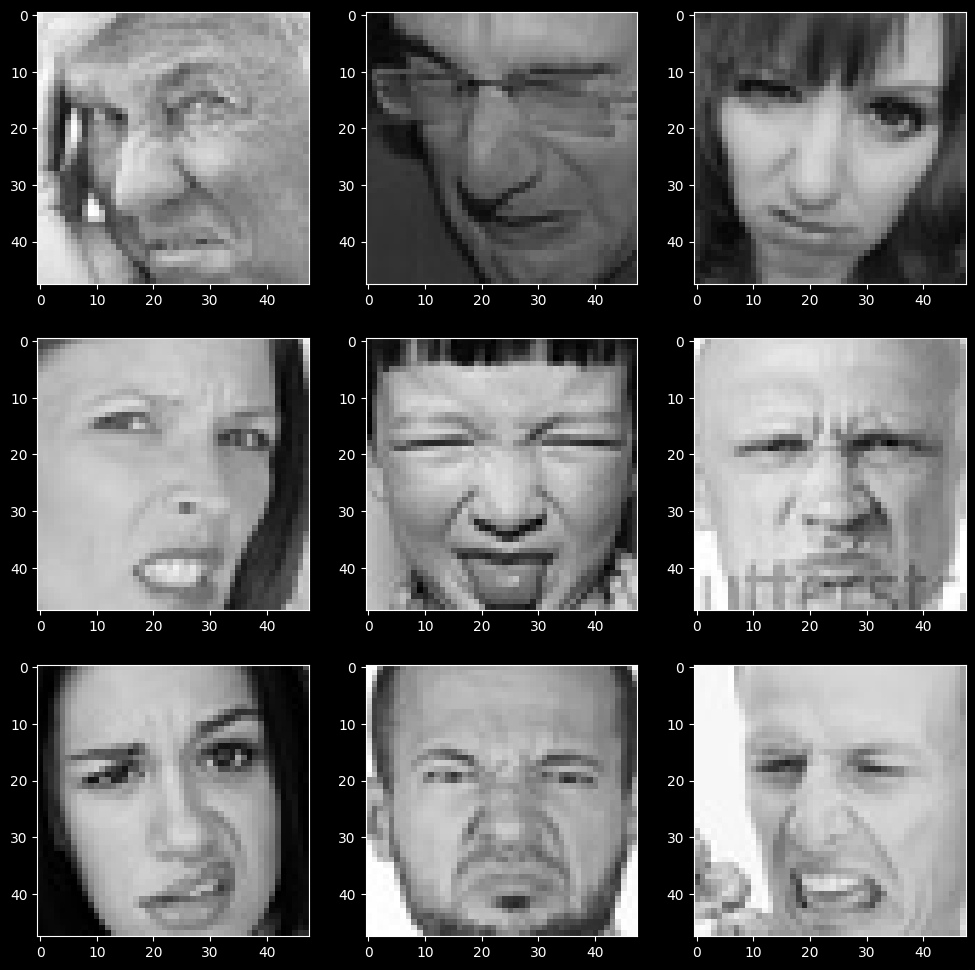

In [5]:
expression = 'disgust'
plt.style.use('dark_background')
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(location+"train/"+expression+"/"+ os.listdir(location + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

**Training And Validation**

In [6]:
batch_size  = 130

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(location+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(location+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


**Training of a Model**

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.regularizers import l2

no_of_classes = 7

model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

# Fully connected 1st layer
model.add(Dense(256, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

# Learning rate scheduler
def lr_schedule(epoch):
    lr = 0.0001
    if epoch > 50:
        lr *= 0.1
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Adam optimizer with variable name clarity
adam_optimizer = Adam(lr=0.0001)

model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

**Model Fitting**

In [9]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./mode_new", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [17]:
Result = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

/tmp/ipykernel_32/4096121354.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Result = model.fit_generator(generator=train_set,


Epoch 1/48
221/221 [==============================] - 761s 3s/step - loss: 1.3191 - accuracy: 0.6032 - val_loss: 1.3130 - val_accuracy: 0.5766 - lr: 2.0000e-04
Epoch 2/48
221/221 [==============================] - 755s 3s/step - loss: 1.2104 - accuracy: 0.6140 - val_loss: 1.2600 - val_accuracy: 0.5936 - lr: 2.0000e-04
Epoch 3/48
221/221 [==============================] - 760s 3s/step - loss: 1.1848 - accuracy: 0.6273 - val_loss: 1.3007 - val_accuracy: 0.5697 - lr: 2.0000e-04
Epoch 4/48
221/221 [==============================] - 759s 3s/step - loss: 1.1616 - accuracy: 0.6392 - val_loss: 1.2462 - val_accuracy: 0.6113 - lr: 2.0000e-04
Epoch 5/48
221/221 [==============================] - 759s 3s/step - loss: 1.1437 - accuracy: 0.6411 - val_loss: 1.3386 - val_accuracy: 0.5692 - lr: 2.0000e-04
Epoch 6/48
221/221 [==============================] - 756s 3s/step - loss: 1.1287 - accuracy: 0.6518 - val_loss: 1.2987 - val_accuracy: 0.5876 - lr: 2.0000e-04
Epoch 7/48
221/221 [====================

In [18]:
model.save("mode_new")

**Plotting Accuracy & Loss**

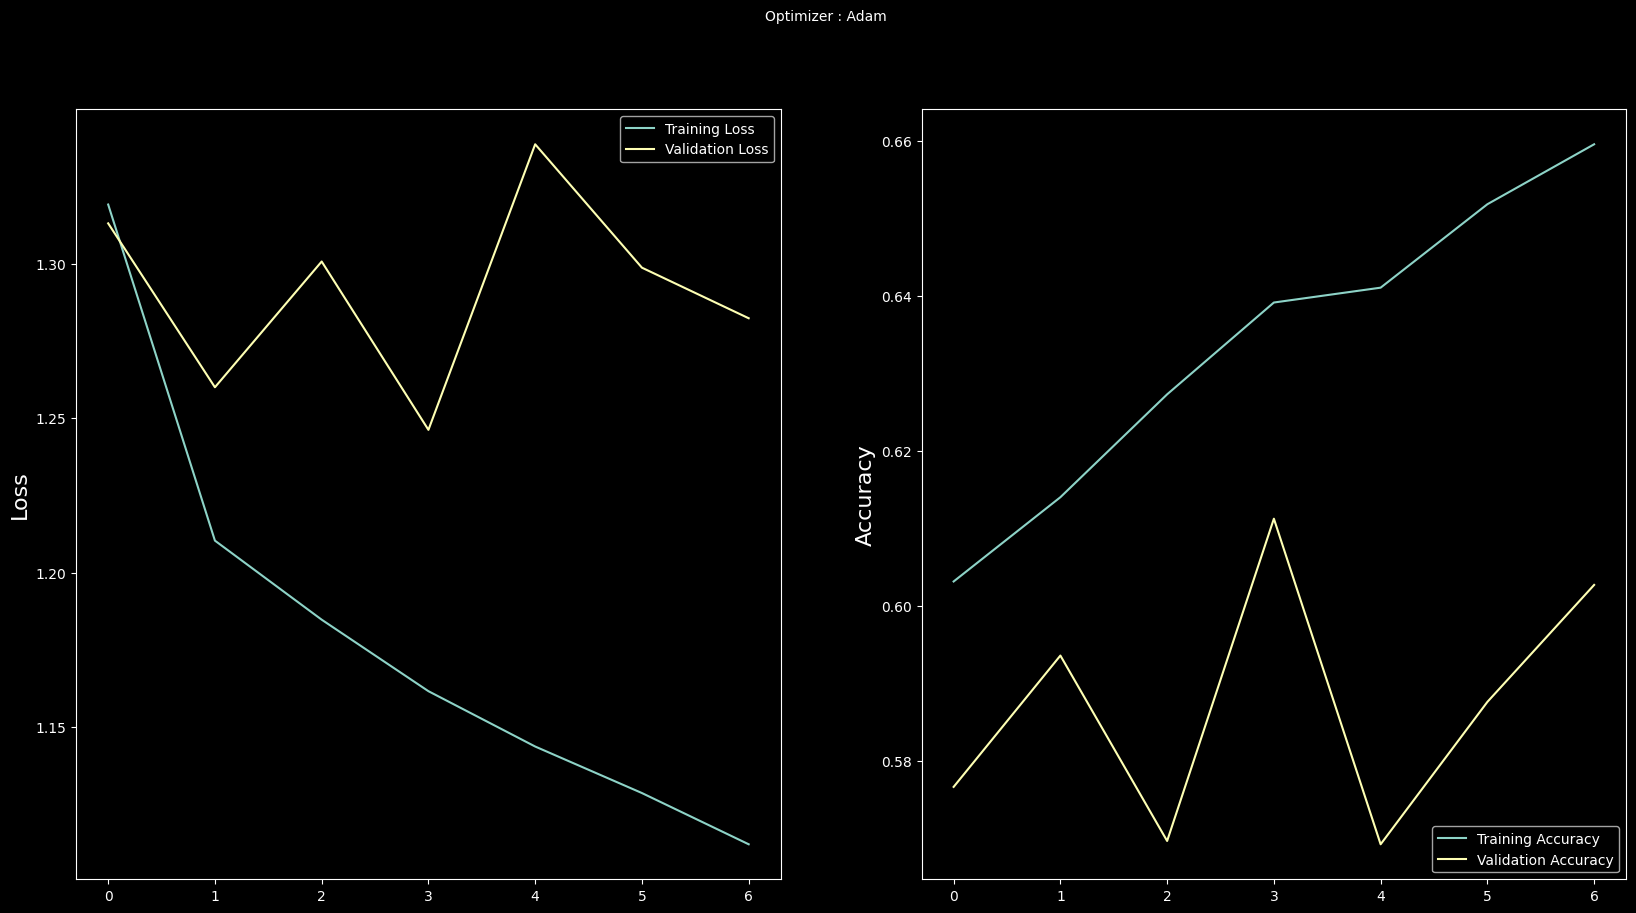

In [20]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(Result.history['loss'], label='Training Loss')
plt.plot(Result.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(Result.history['accuracy'], label='Training Accuracy')
plt.plot(Result.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
